Predicted student count for ED in 2025: 261
Predicted student count for HM in 2025: 250
Predicted student count for IT in 2025: 275
Predicted student count for TM in 2025: 144


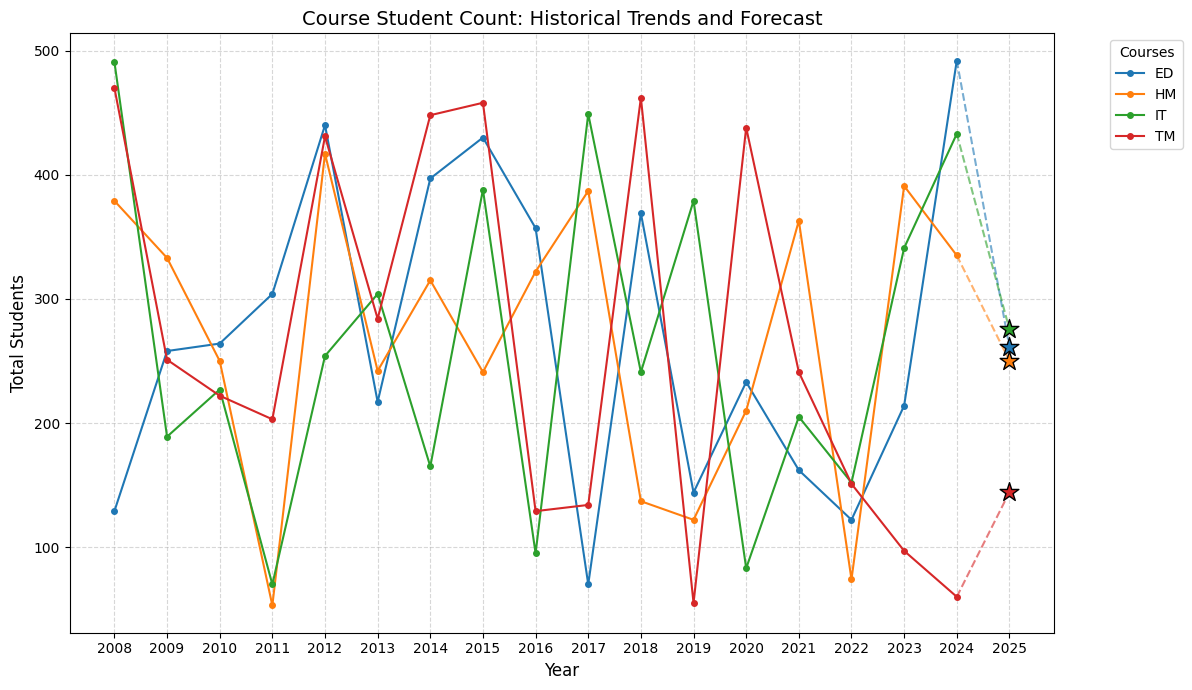

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Load the data
try:
    df = pd.read_excel("./course_student_count_2008_2024.xlsx")
except FileNotFoundError:
    print("Excel file not found. Please ensure the file is in the correct directory.")
    # Exit or use sample data logic here
    exit()

data = df.sort_values(by=["Course", "Year"])
courses = data["Course"].unique()

# Setup Plot
plt.figure(figsize=(12, 7))
cmap = plt.get_cmap('tab10')

for i, course in enumerate(courses):
    course_data = data[data["Course"] == course]
    X = course_data[["Year"]].values
    y = course_data["Total_Students"].values
    
    last_year = int(course_data["Year"].max())
    next_year = last_year + 1
    
    # Linear Regression Model
    model = linear_model.LinearRegression()
    model.fit(X, y)
    
    # Predict next year
    predicted_count = model.predict([[next_year]])[0]
    print(f"Predicted student count for {course} in {next_year}: {predicted_count:.0f}")
    
    # Plotting
    color = cmap(i % 10)
    # Historical data points and line
    plt.scatter(next_year, predicted_count, color=color, marker='*', s=200, edgecolors='black', zorder=5)
    plt.plot([last_year, next_year], [y[-1], predicted_count], color=color, linestyle='--', alpha=0.6)

plt.title("Course Student Count: Historical Trends and Forecast", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Students", fontsize=12)
plt.xticks(list(range(data["Year"].min(), next_year + 1)))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Courses", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()